# R only Notbook - EDA Part 1

In [1]:
library('tidyverse')
library('ggcorrplot')
library('magick')
library('png')

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to ImageMagick 6.9.12.3
Enabled features: cairo, freetype, fftw, ghostscript, heic, lcms, pango, raw, rsvg, webp
Disabled features: fontconfig, x11



In [2]:
homes <-  read.csv('kc_house_data.csv')
head(homes)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


## Plot 1- Histogram

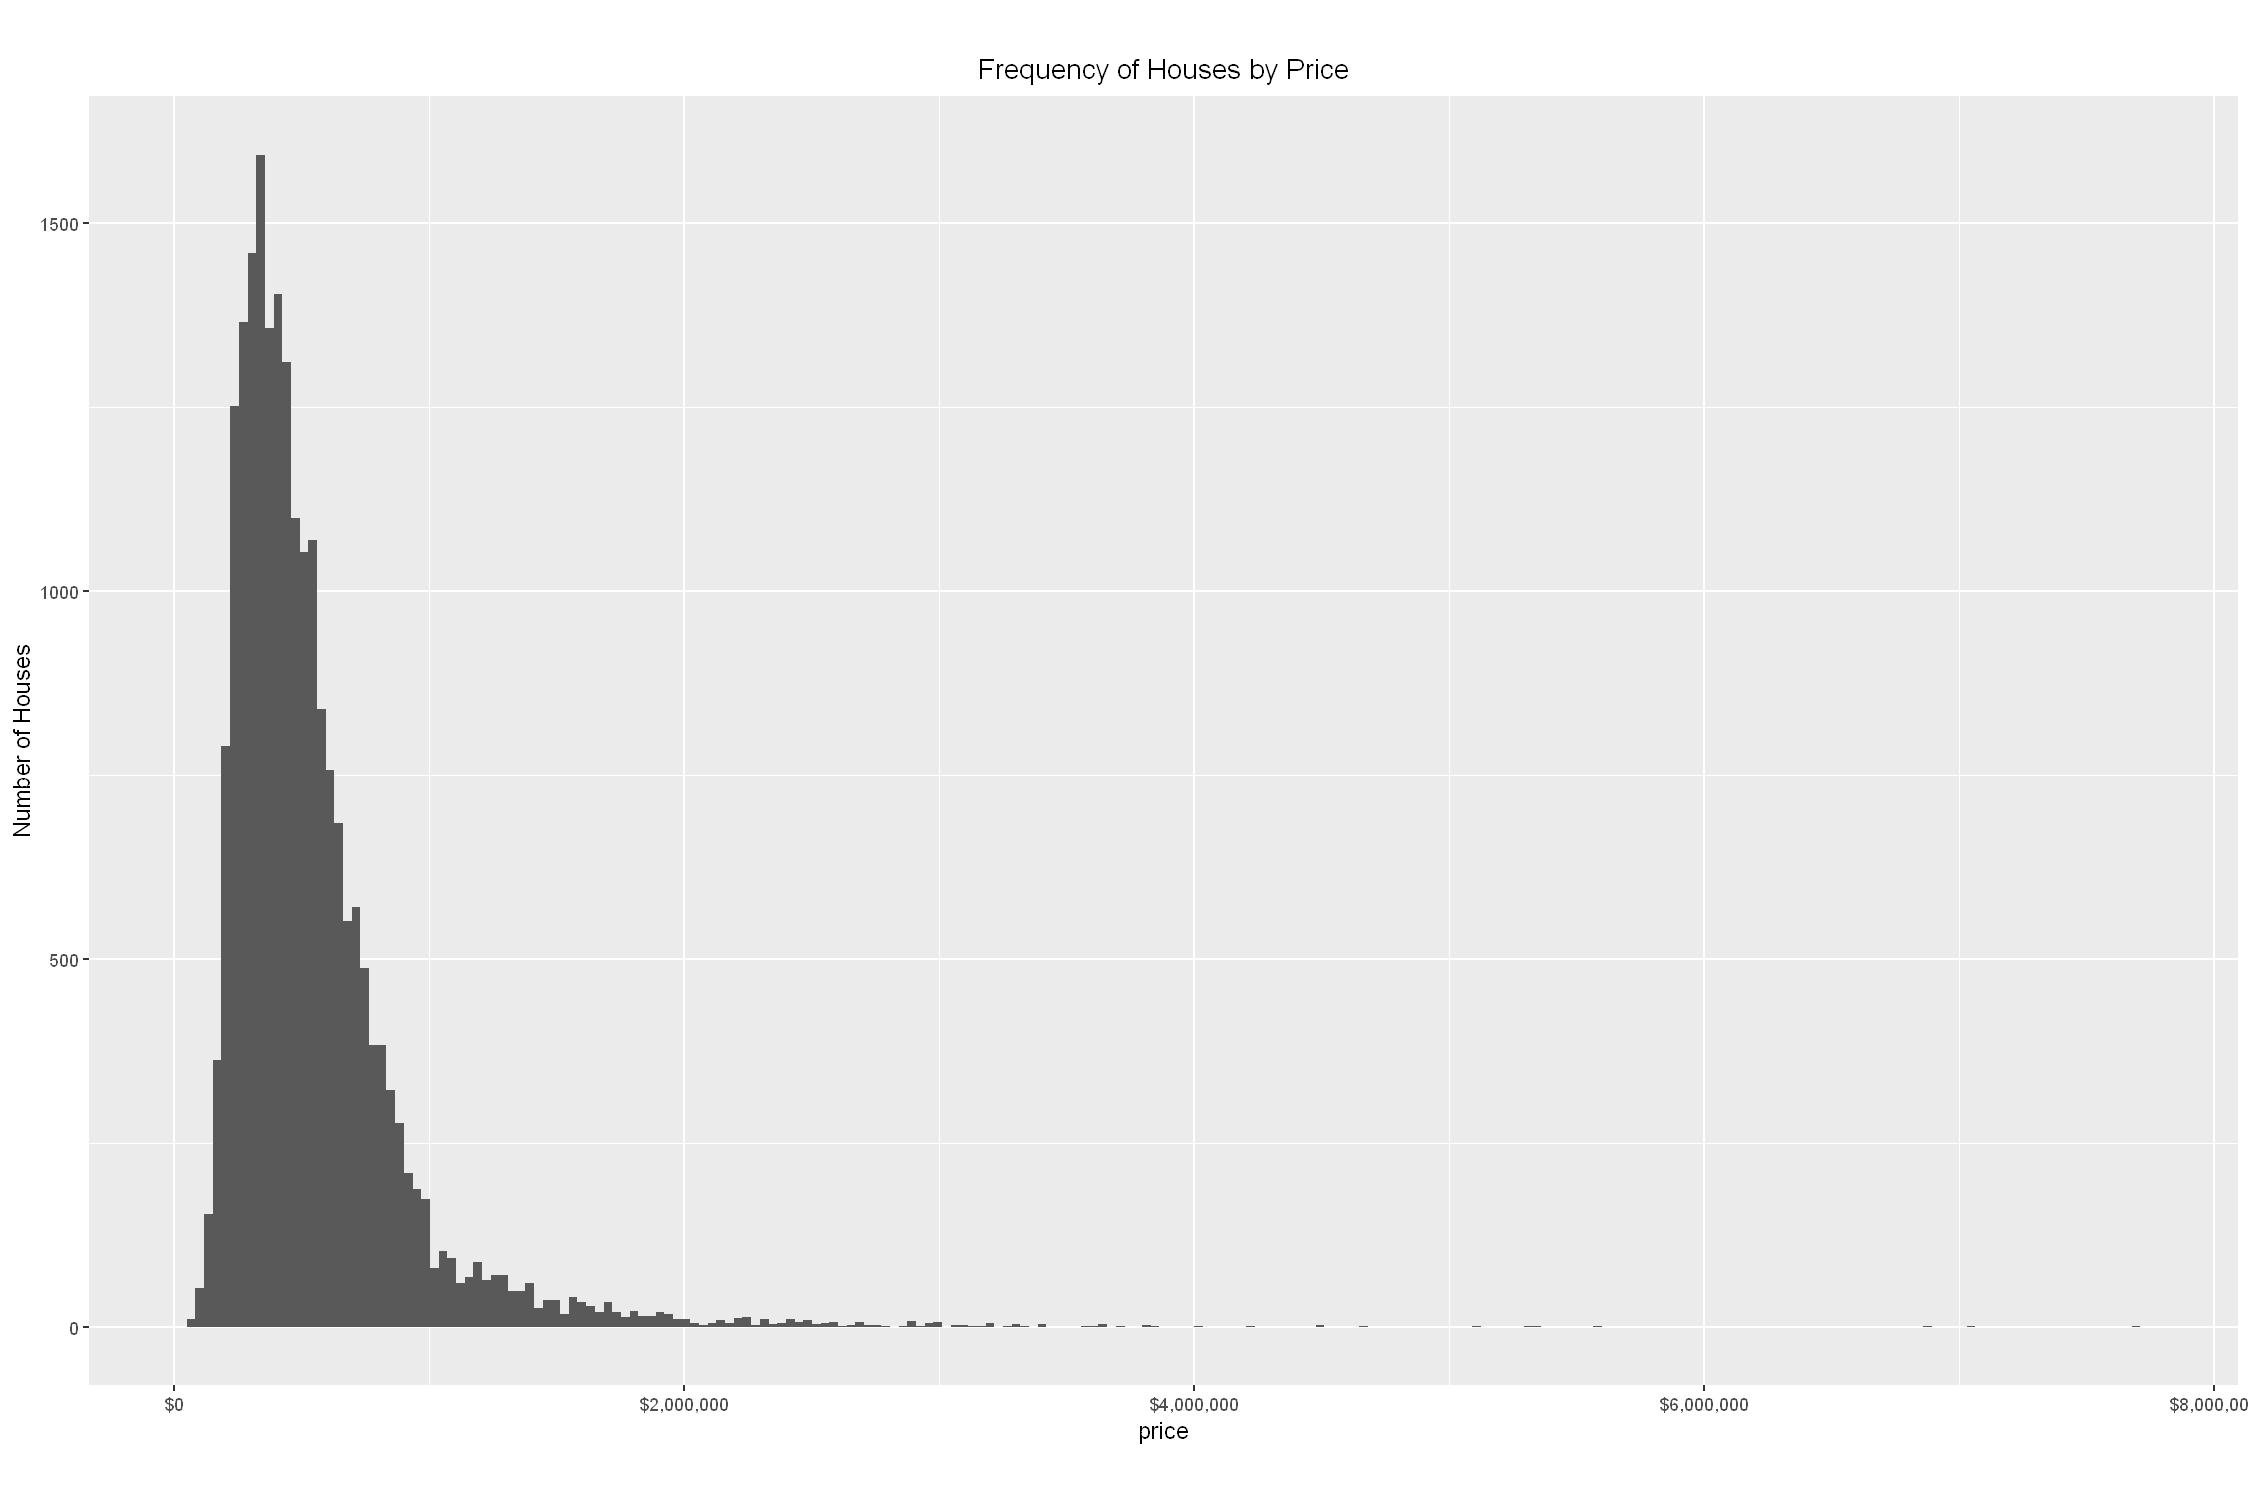

In [6]:
options(repr.plot.res=150,repr.plot.width = 15, repr.plot.height = 10)
plot_1 <- homes %>% ggplot(aes(x=price)) + 
                    geom_histogram(bins = 225) +
                    scale_x_continuous(labels = scales::dollar_format()) +
                    labs(x = 'price',
                         y = 'Number of Houses',
                         title = 'Frequency of Houses by Price') +
                    theme(plot.title = element_text(hjust = .5), aspect.ratio = .6)


plot_1

## Plot 2 - Correlation Matrix

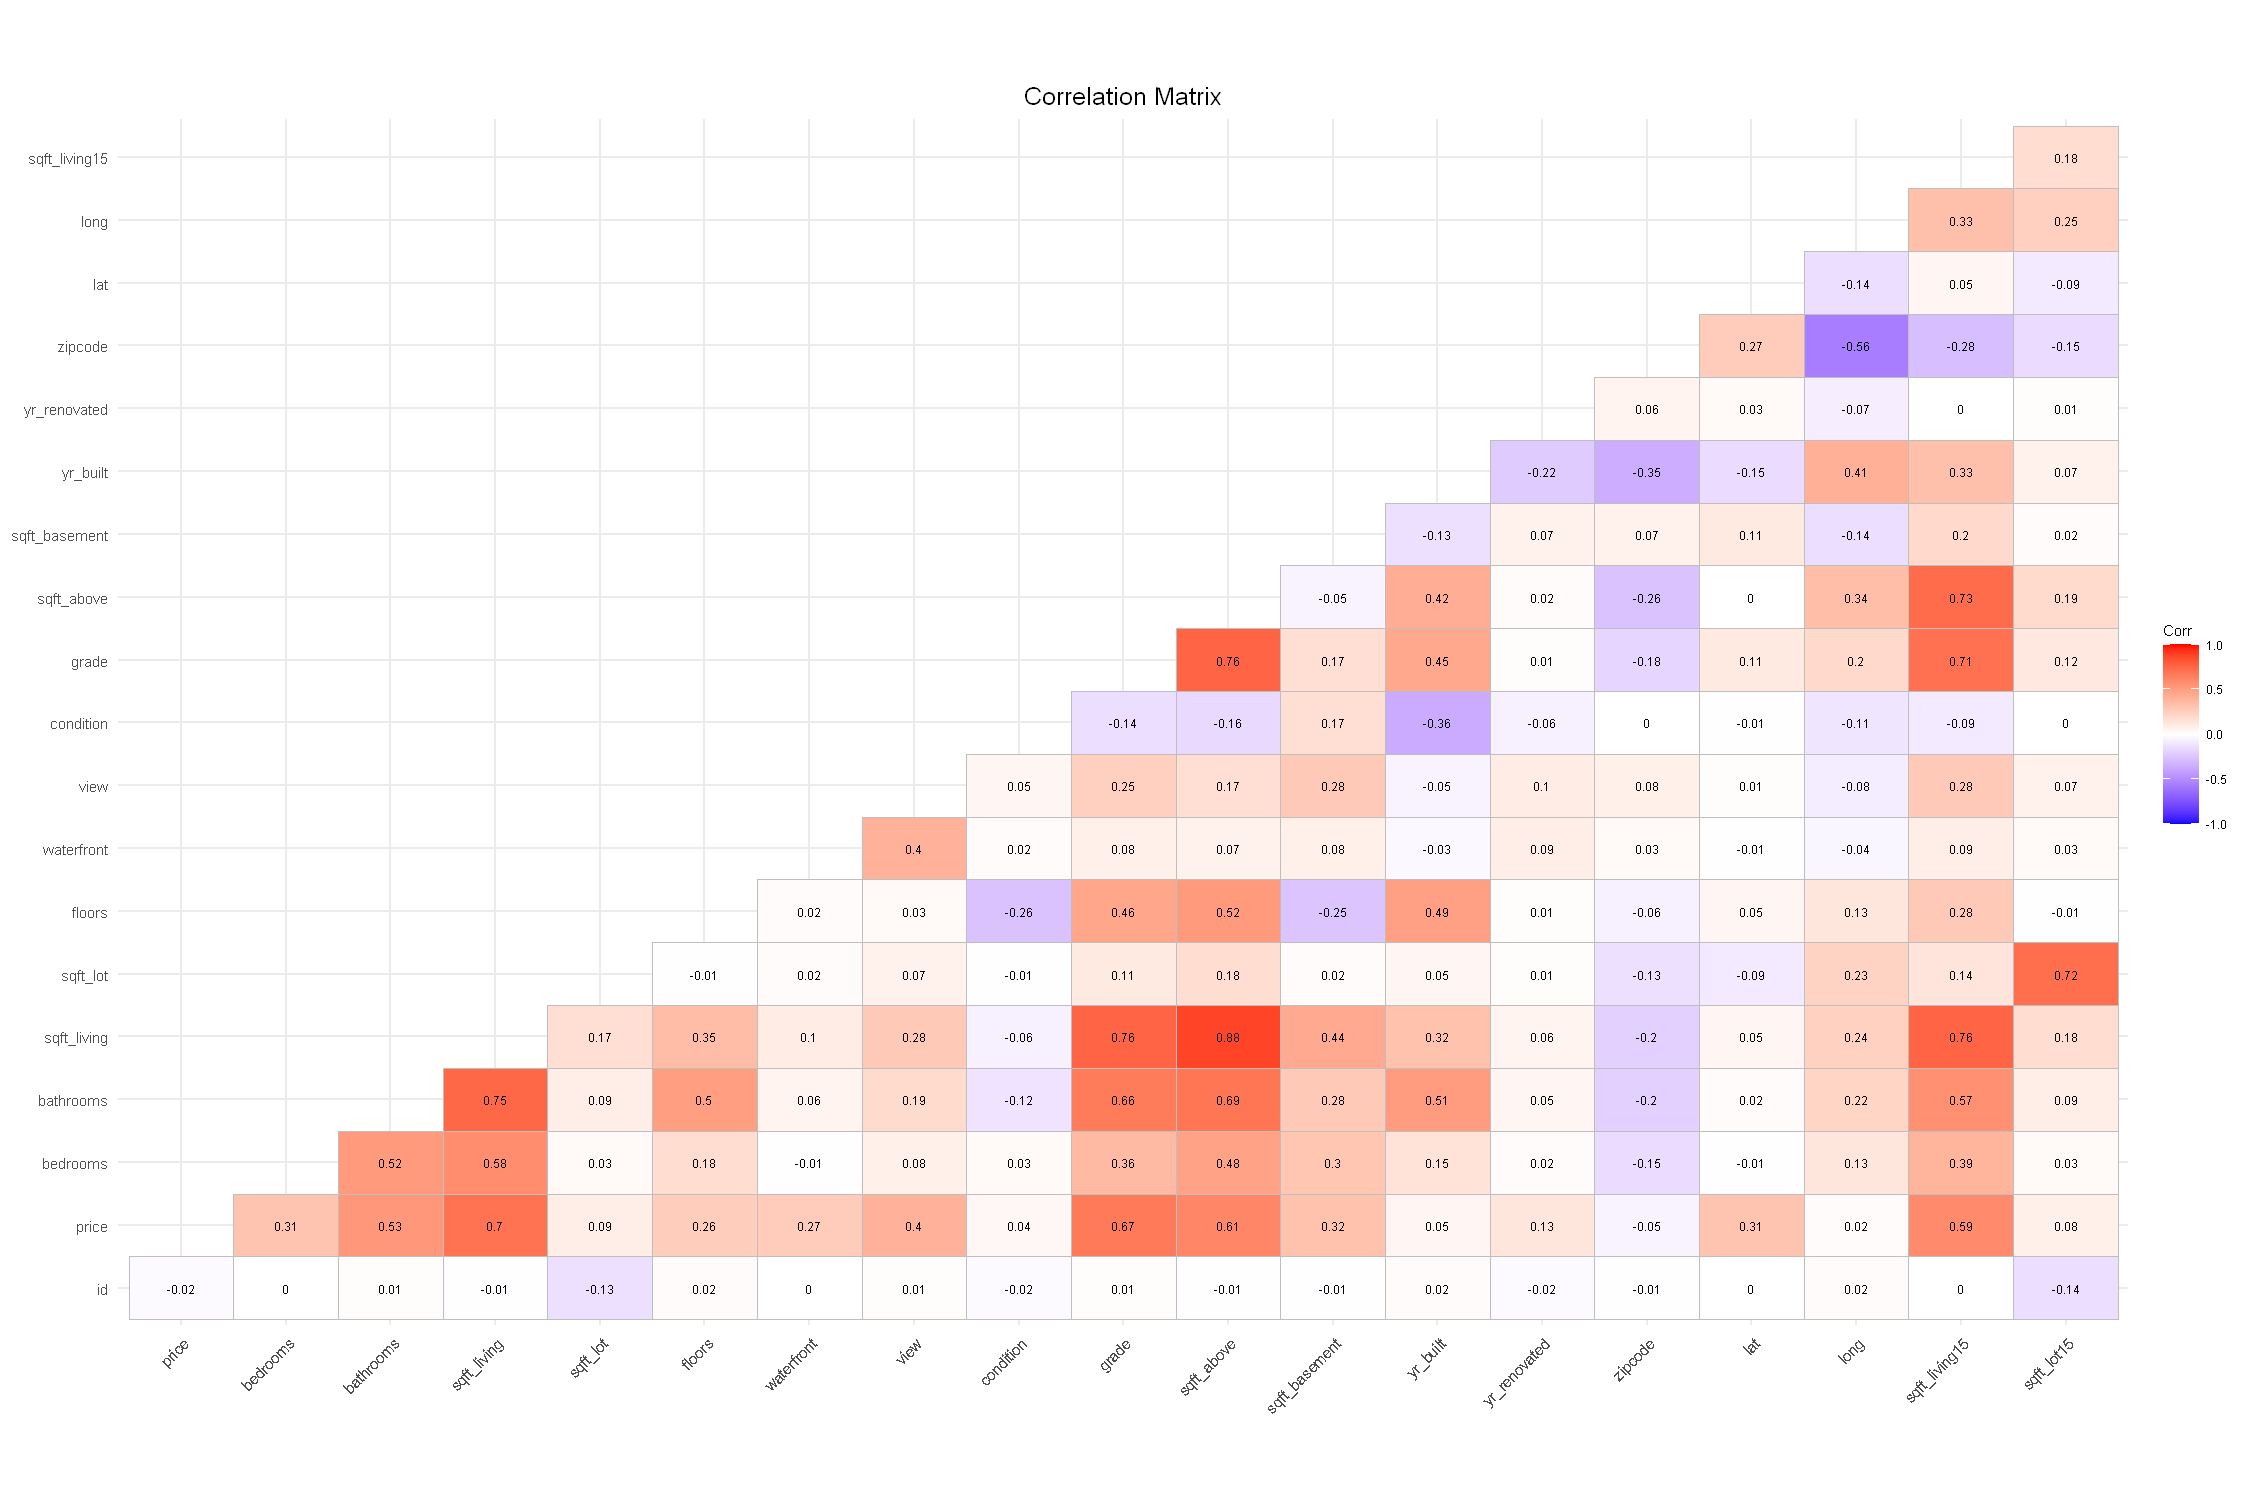

In [8]:
options(repr.plot.res=150,repr.plot.width = 15, repr.plot.height = 10)
plot_2 <- ggcorrplot(cor(homes %>% subset(select = - date), use = 'pairwise.complete.obs'),
                     type = 'lower', lab = TRUE, lab_size = 2, sig.level = 0.01) +
                    theme(text = element_text(size = 7),axis.text.x = element_text(size = 7),
                          axis.text.y = element_text(size = 7)) +
                    labs(title = 'Correlation Matrix') +
                    theme(plot.title = element_text(hjust = .5, size = 12),aspect.ratio = .6)
    

plot_2

## Plot 3 - Bar Plot to Analyze Bedrooms

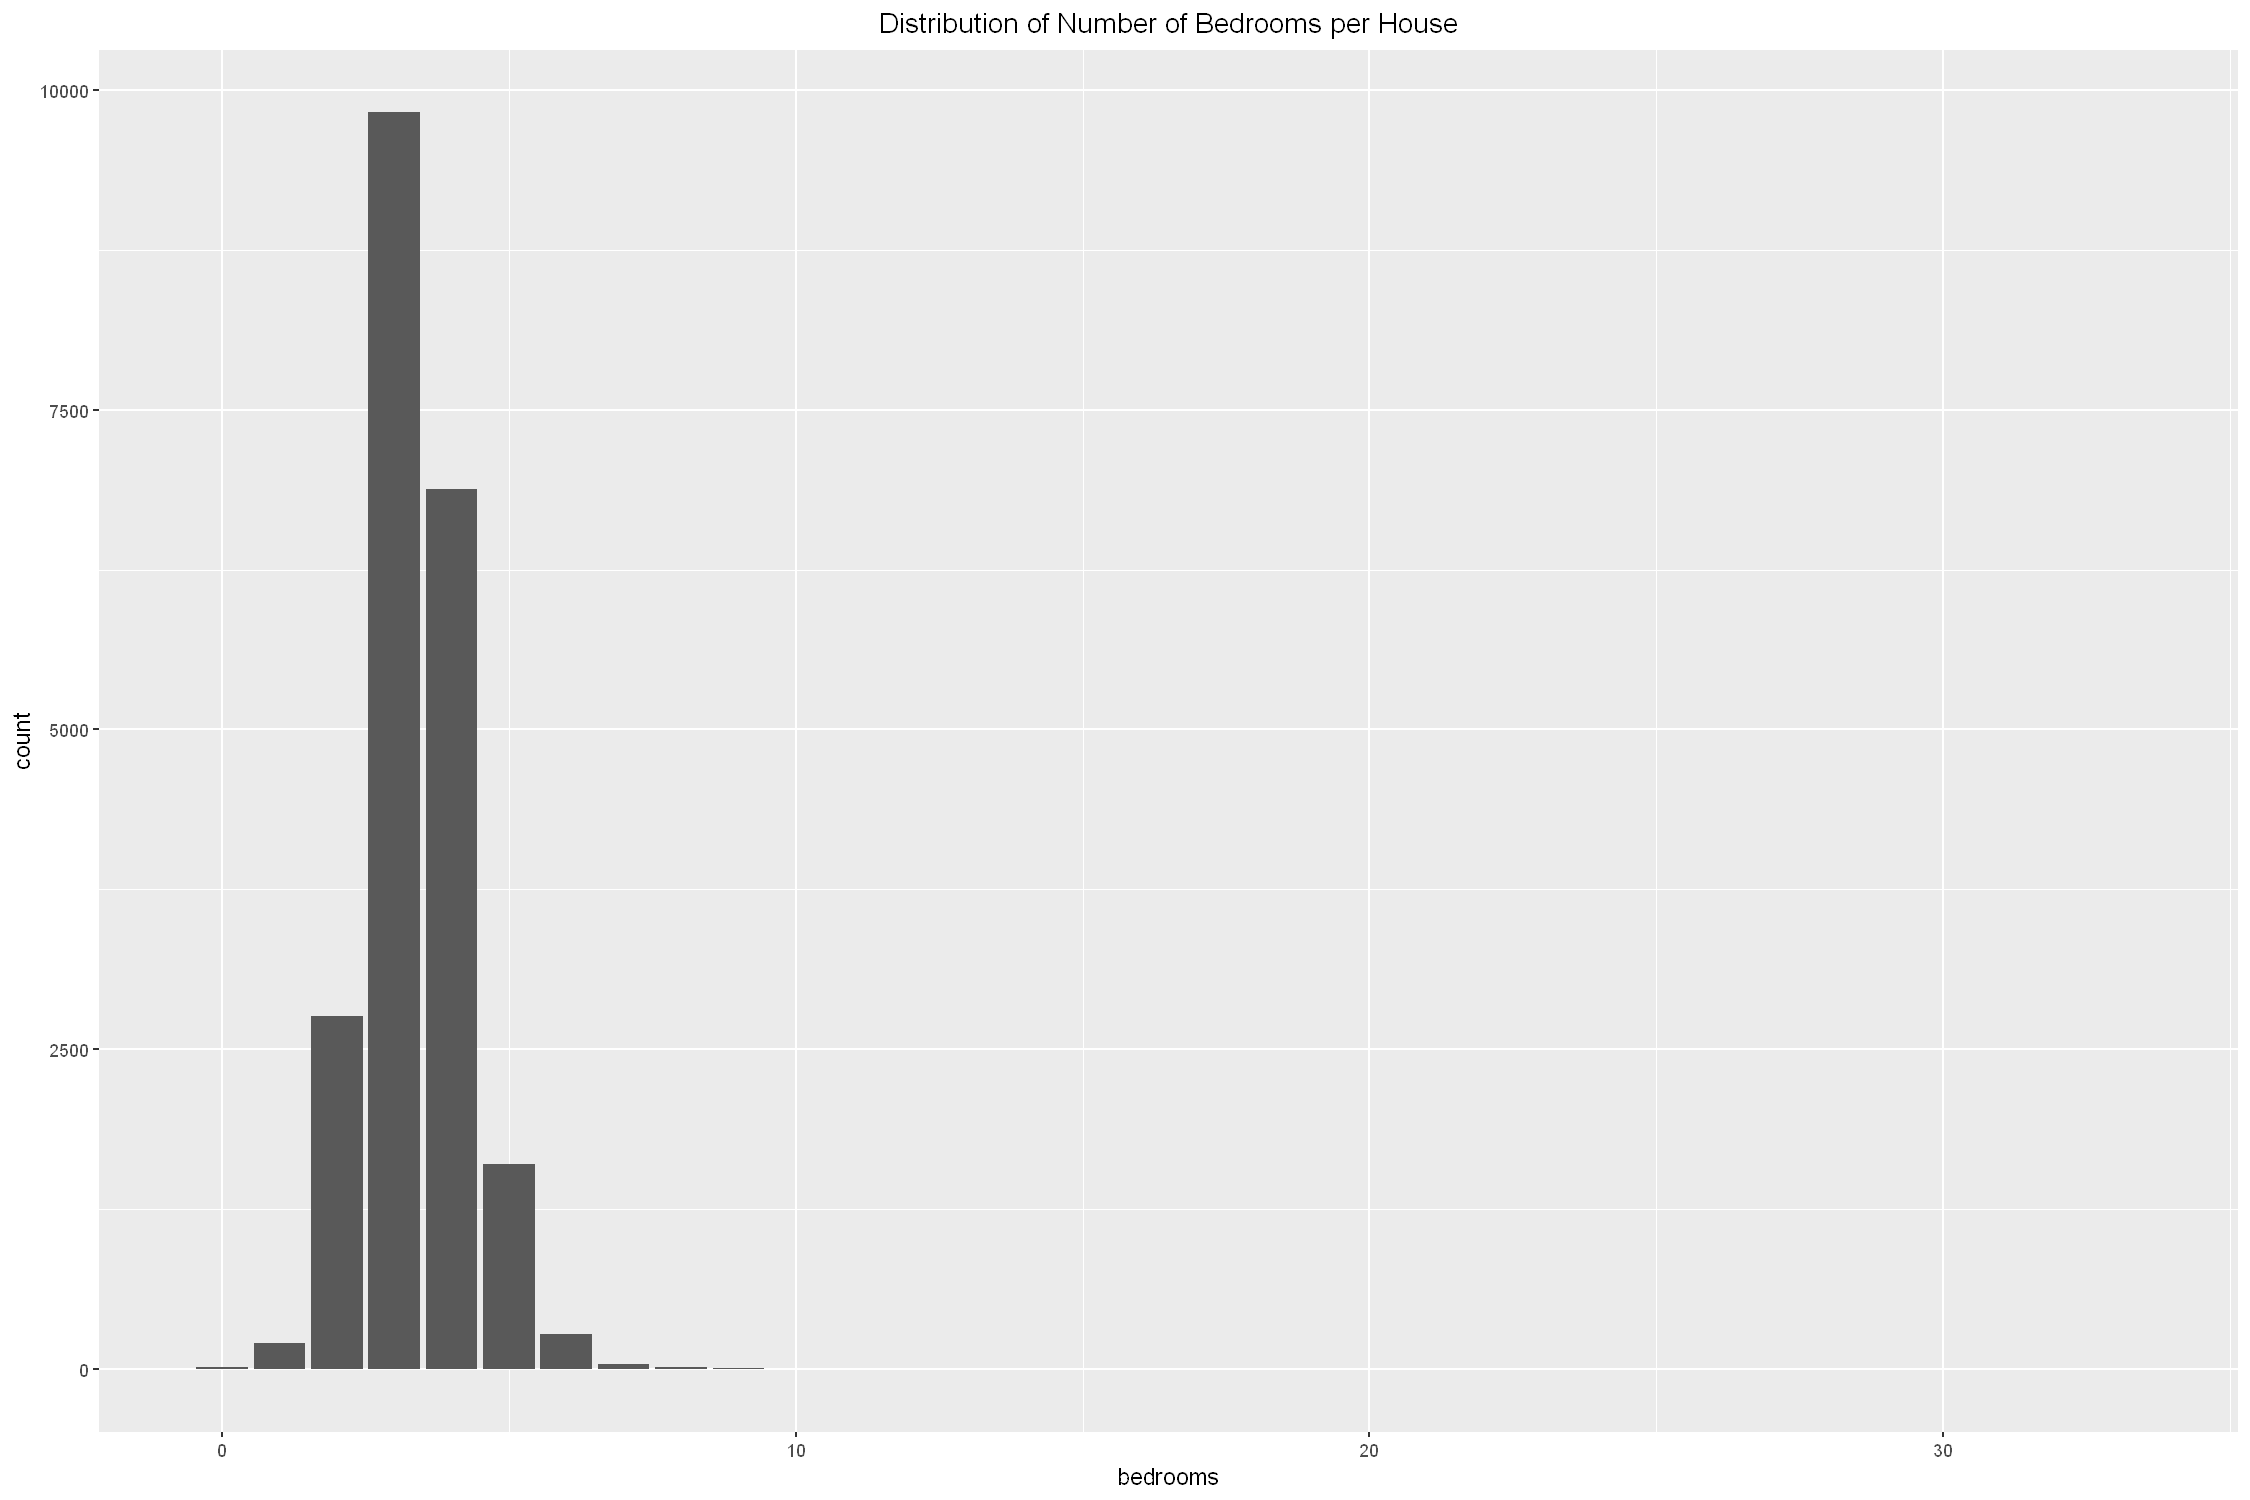

In [26]:
options(repr.plot.res=150,repr.plot.width = 15, repr.plot.height = 10)
plot_3 <- homes %>% ggplot(aes(x = bedrooms)) +
          geom_bar() + 
          labs(title = 'Distribution of Number of Bedrooms per House') +
          theme(plot.title = element_text(hjust = .5))

plot_3

## Plot 4 - Box and Whisker Plot with Scatter to Analyze Bathrooms

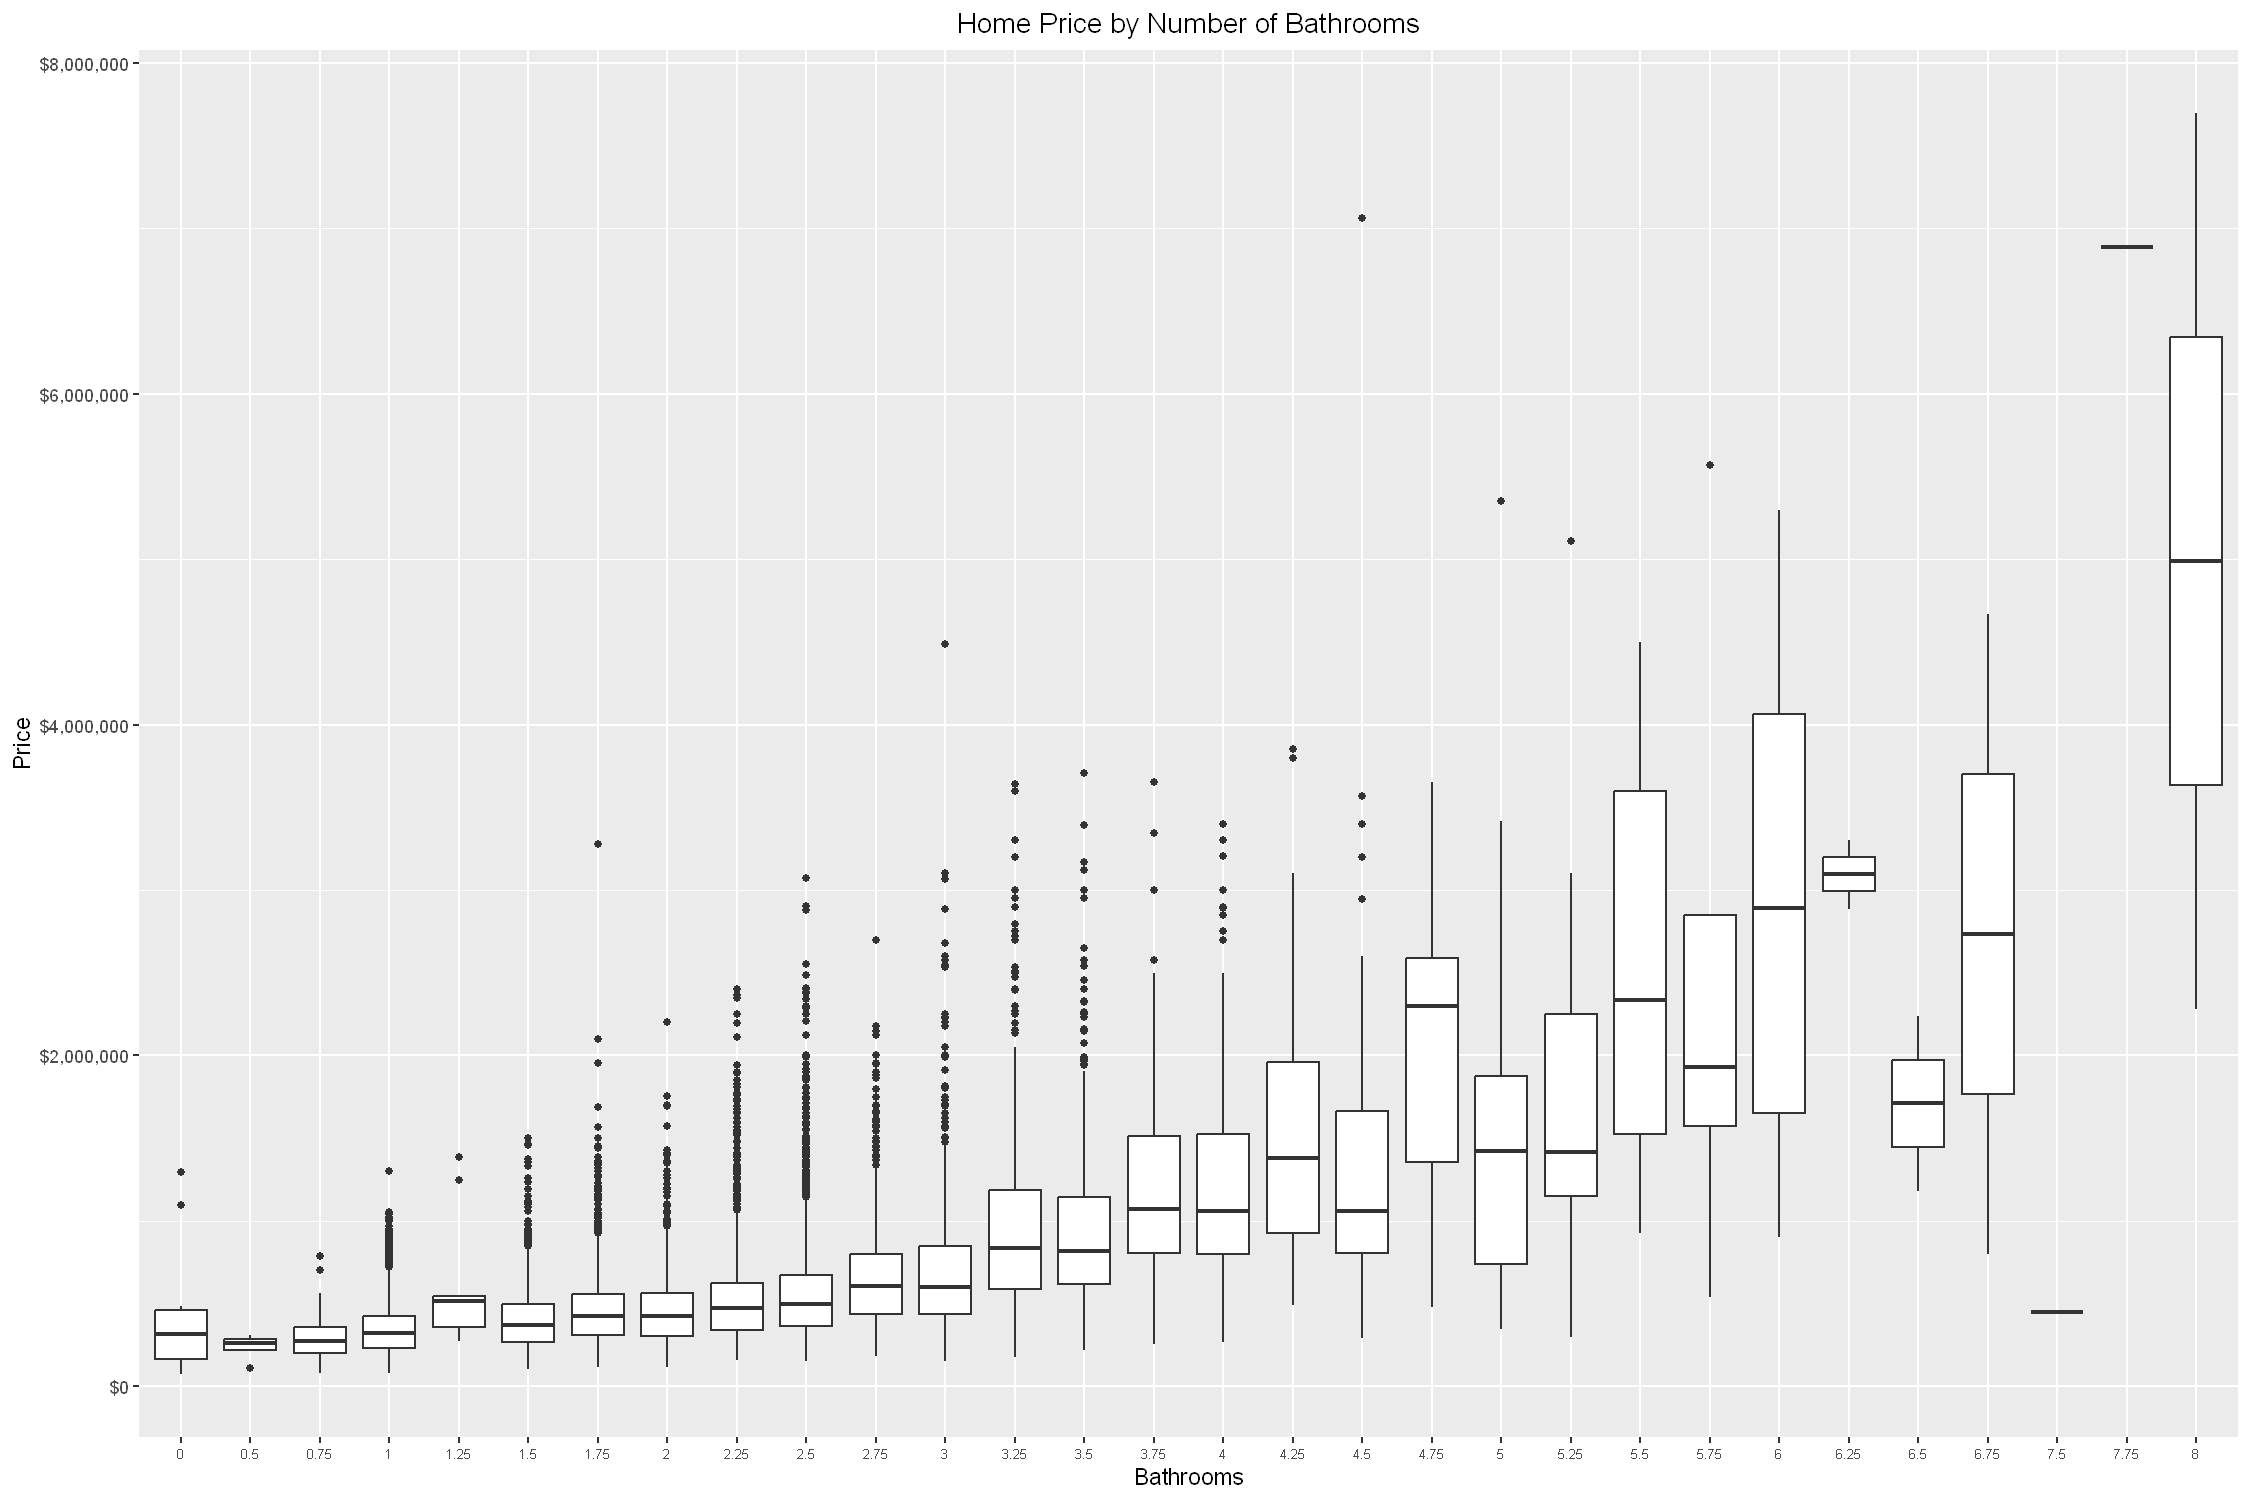

In [28]:
options(repr.plot.res=150,repr.plot.width = 15, repr.plot.height = 10)
bathrooms_factor <- as.factor(homes$bathrooms)

plot_4 <- homes %>% ggplot(aes(x = bathrooms_factor, y = price)) + geom_boxplot() + 
          scale_y_continuous(labels = scales::dollar_format())  + 
          labs(x = 'Bathrooms',
               y = 'Price',
               title = 'Home Price by Number of Bathrooms') +
          theme(plot.title = element_text(hjust = .5), axis.text.x = element_text(size = 6))

plot_4

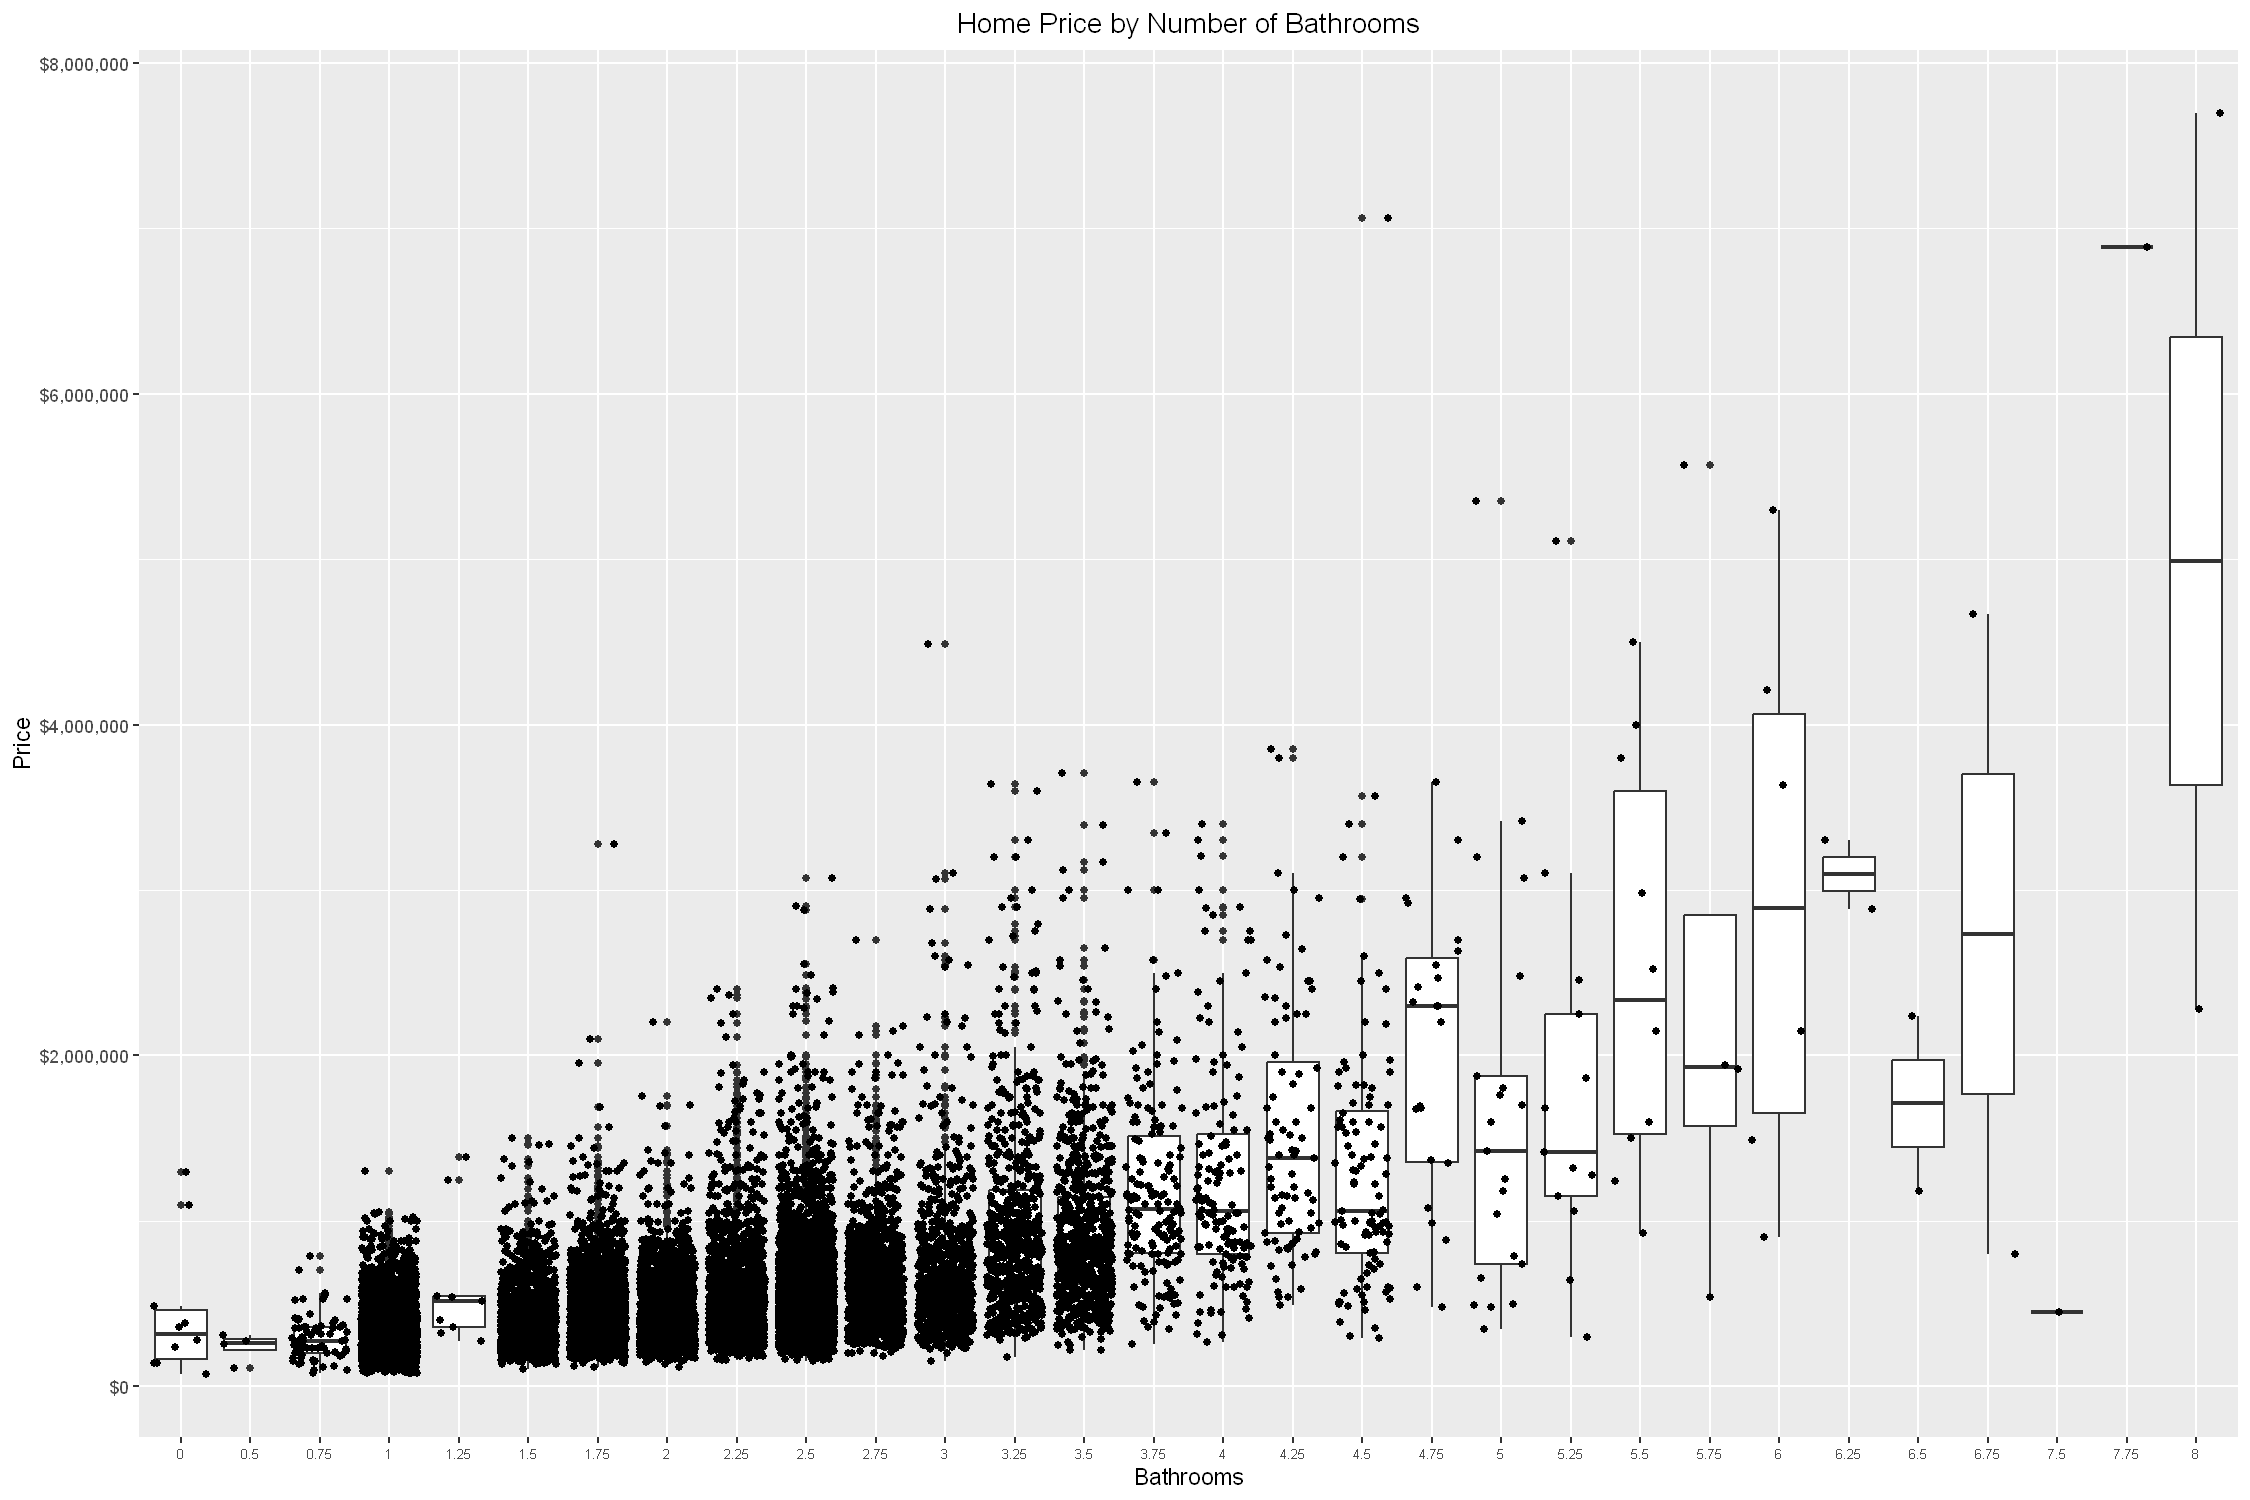

In [30]:
options(repr.plot.res=150,repr.plot.width = 15, repr.plot.height = 10)
bathrooms_factor <- as.factor(homes$bathrooms)
plot_4_1 <- homes %>% ggplot(aes(x = bathrooms_factor, y = price)) + geom_boxplot() + 
          geom_jitter() + 
          scale_y_continuous(labels = scales::dollar_format())  + 
          labs(x = 'Bathrooms',
               y = 'Price',
               title = 'Home Price by Number of Bathrooms') +
          theme(plot.title = element_text(hjust = .5), axis.text.x = element_text(size = 6))
plot_4_1

## Plot 5 - Scatter Plot to Analyze Home Size

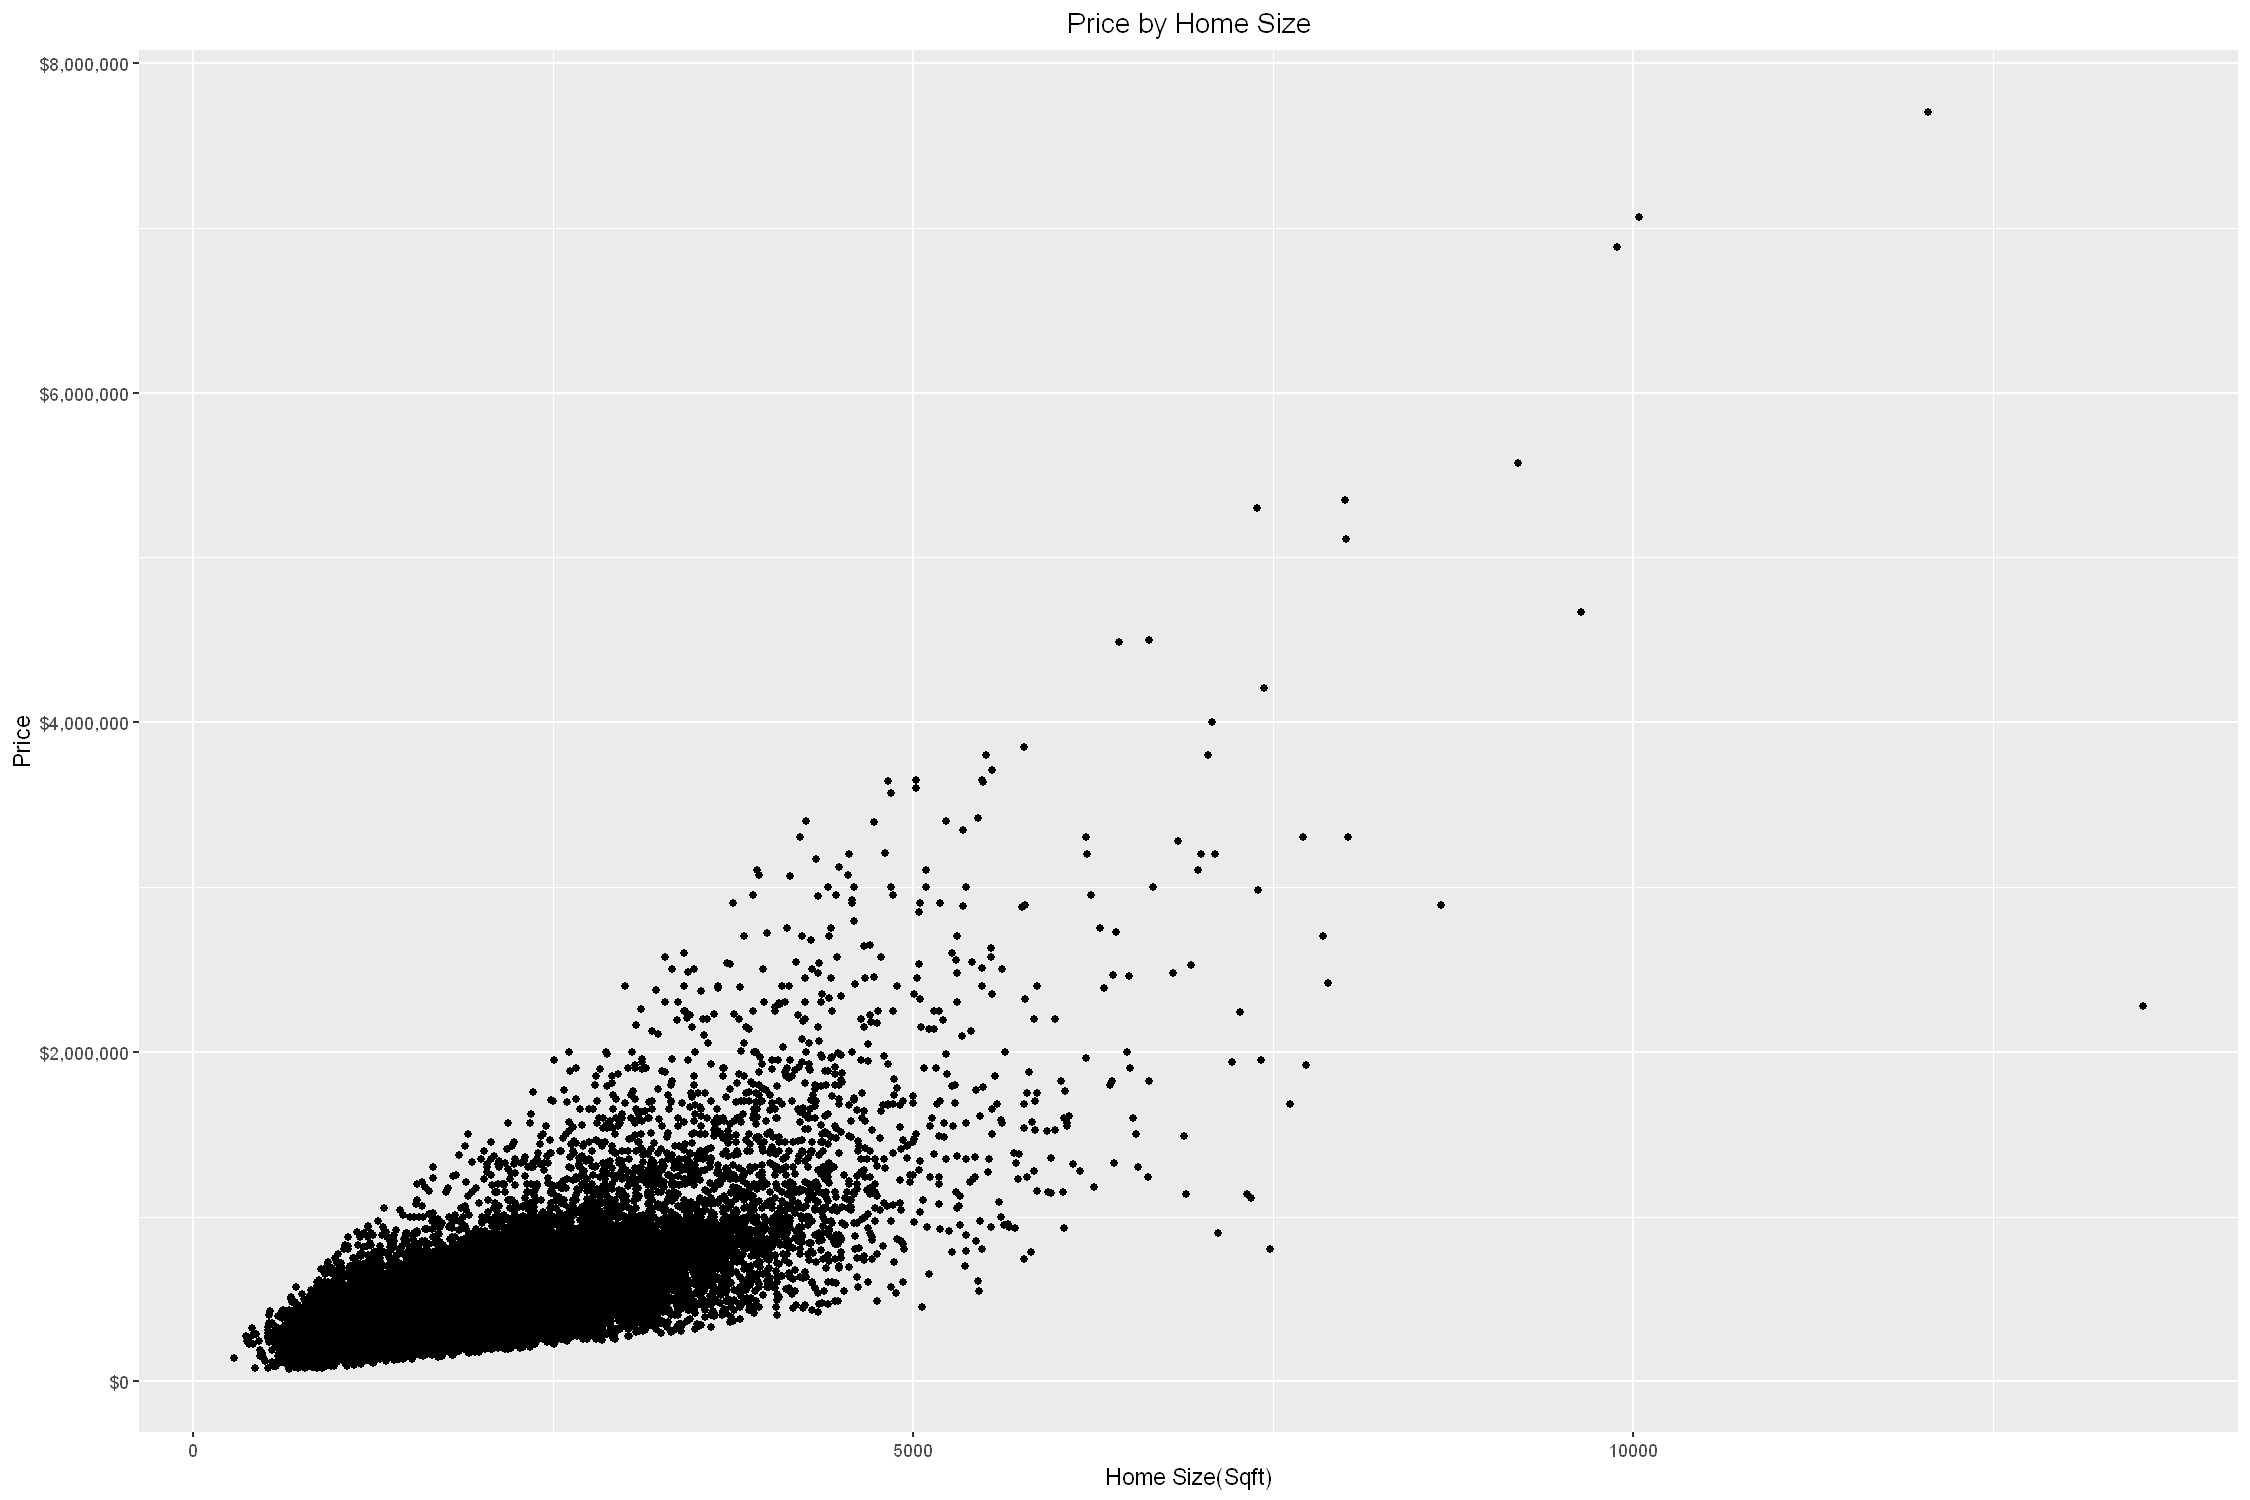

In [32]:
options(repr.plot.res=150,repr.plot.width = 15, repr.plot.height = 10)
plot_5 <- homes %>% ggplot(aes(x = sqft_living, y = price)) + 
          geom_point() + 
          scale_y_continuous(labels = scales::dollar_format())  +
          labs(x = 'Home Size(Sqft)',
               y = 'Price',
               title = 'Price by Home Size')+
          theme(plot.title = element_text(hjust = .5))

plot_5

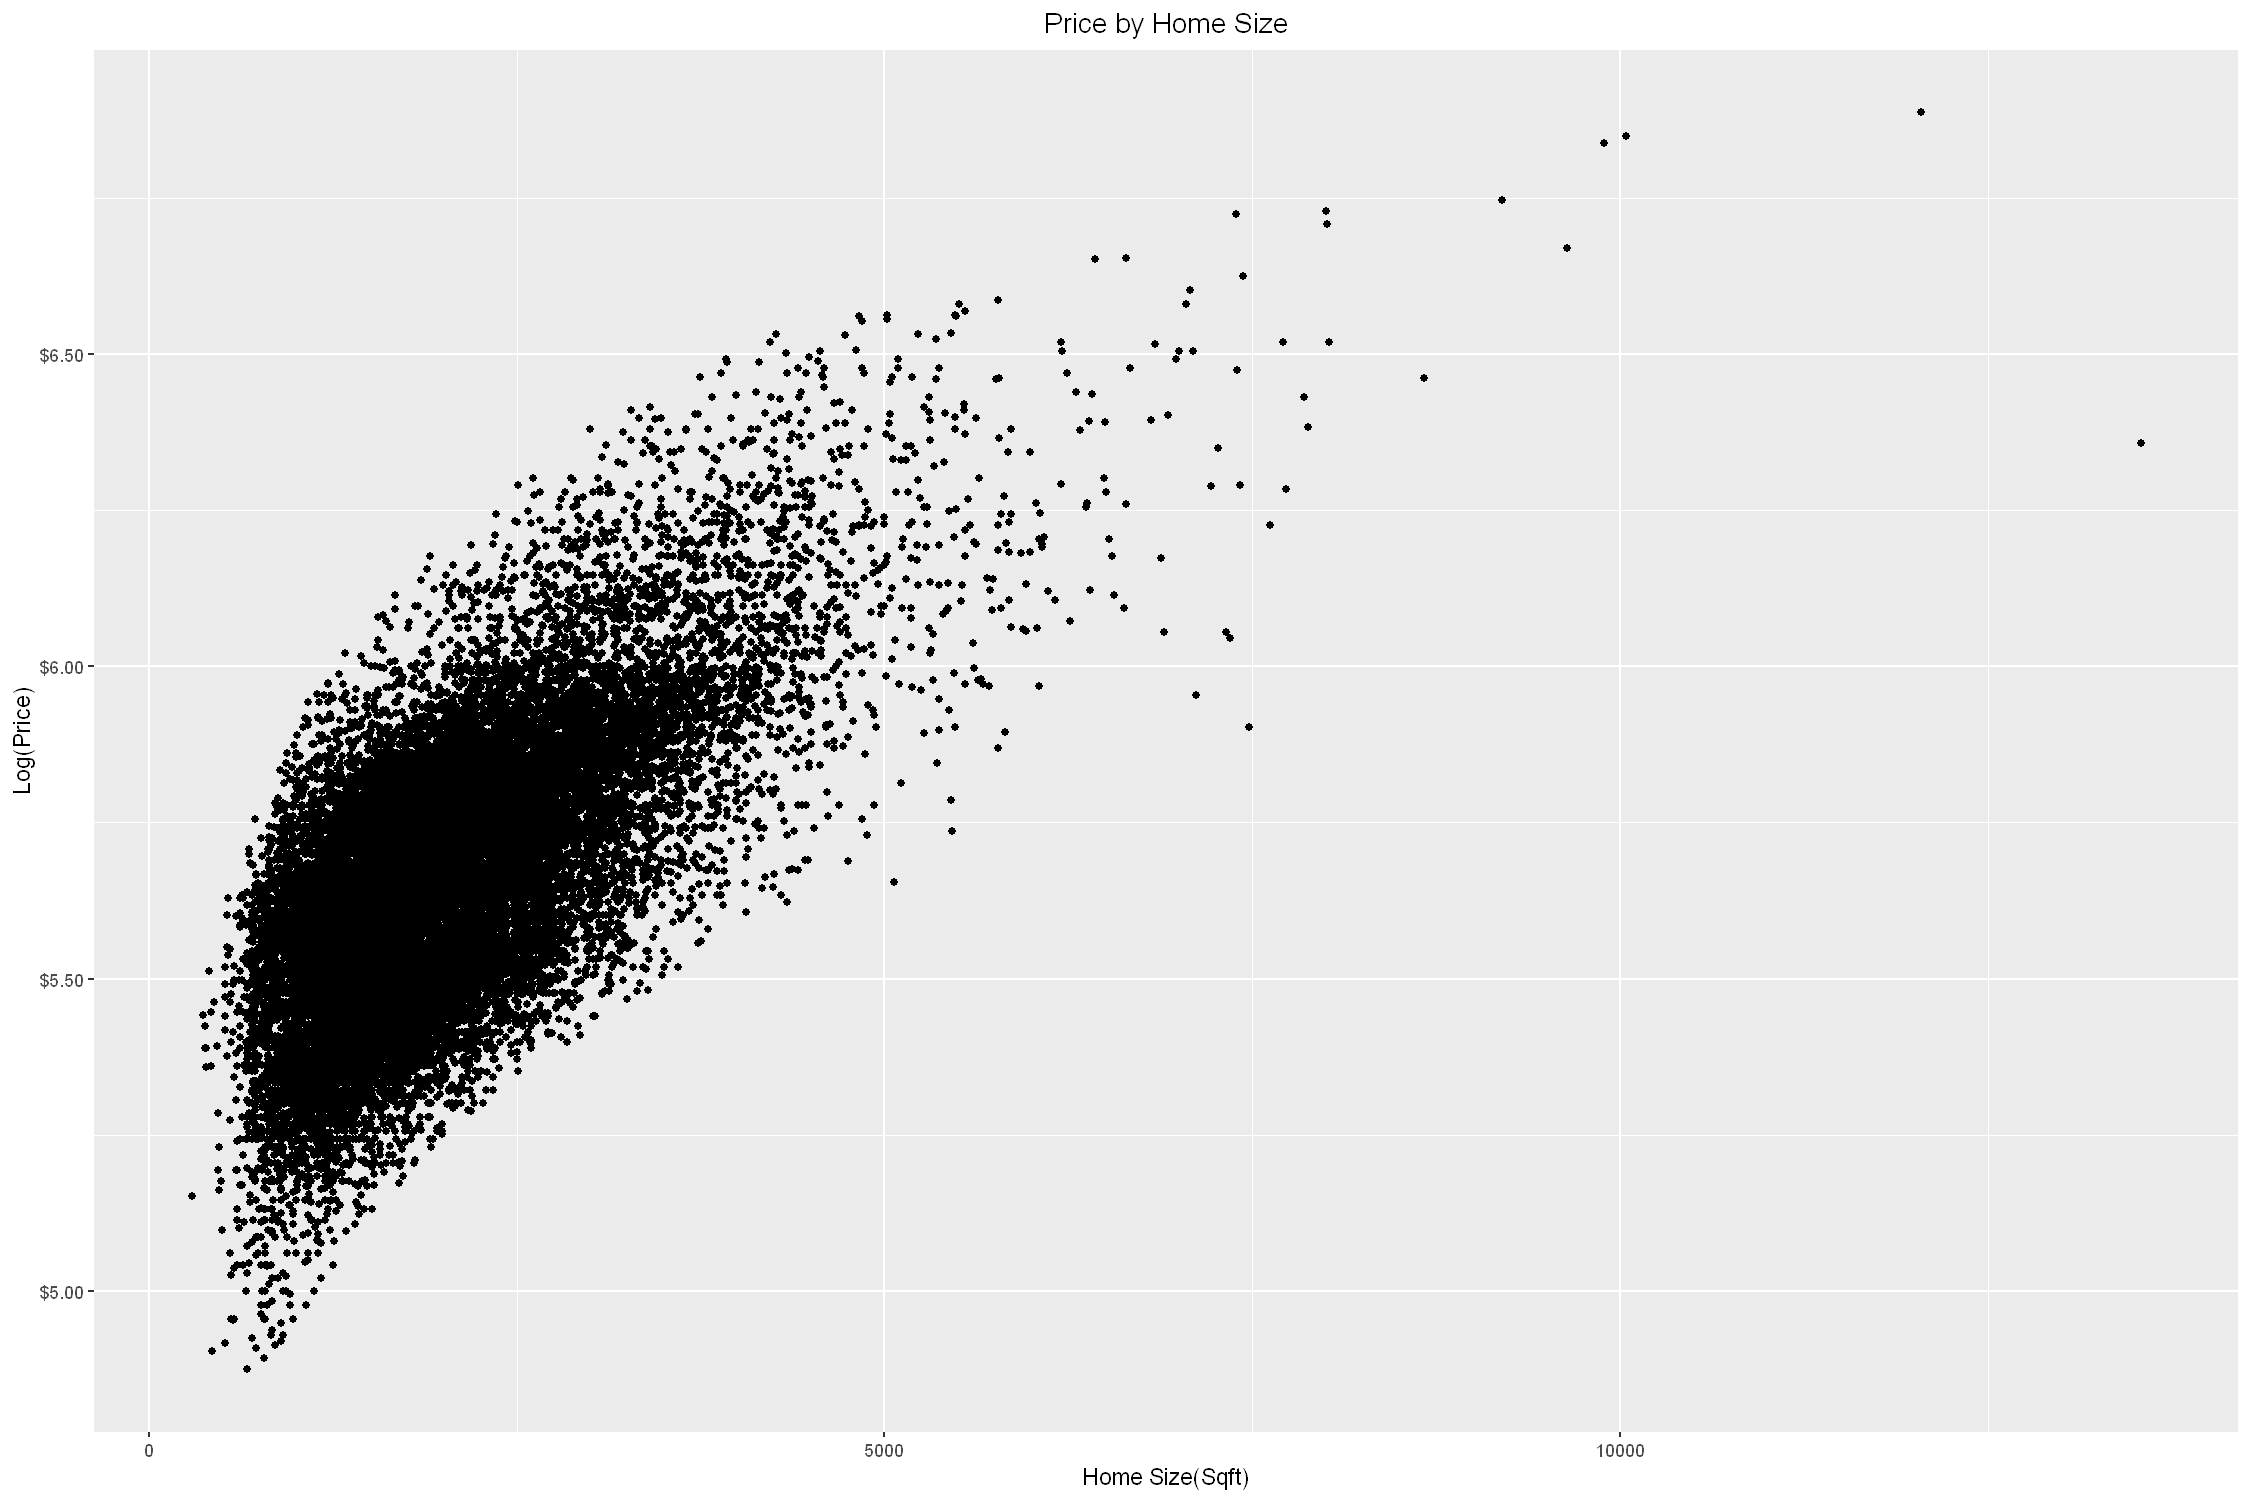

In [34]:
options(repr.plot.res=150,repr.plot.width = 15, repr.plot.height = 10)
plot_5_1 <- homes %>% ggplot(aes(x = sqft_living, y = log(price,base = 10))) + 
          geom_point() + 
          scale_y_continuous(labels = scales::dollar_format())  +
          labs(x = 'Home Size(Sqft)',
               y = 'Log(Price)',
               title = 'Price by Home Size')+
          theme(plot.title = element_text(hjust = .5))

plot_5_1

## Plot 6 - Map of King County to Analyze Location

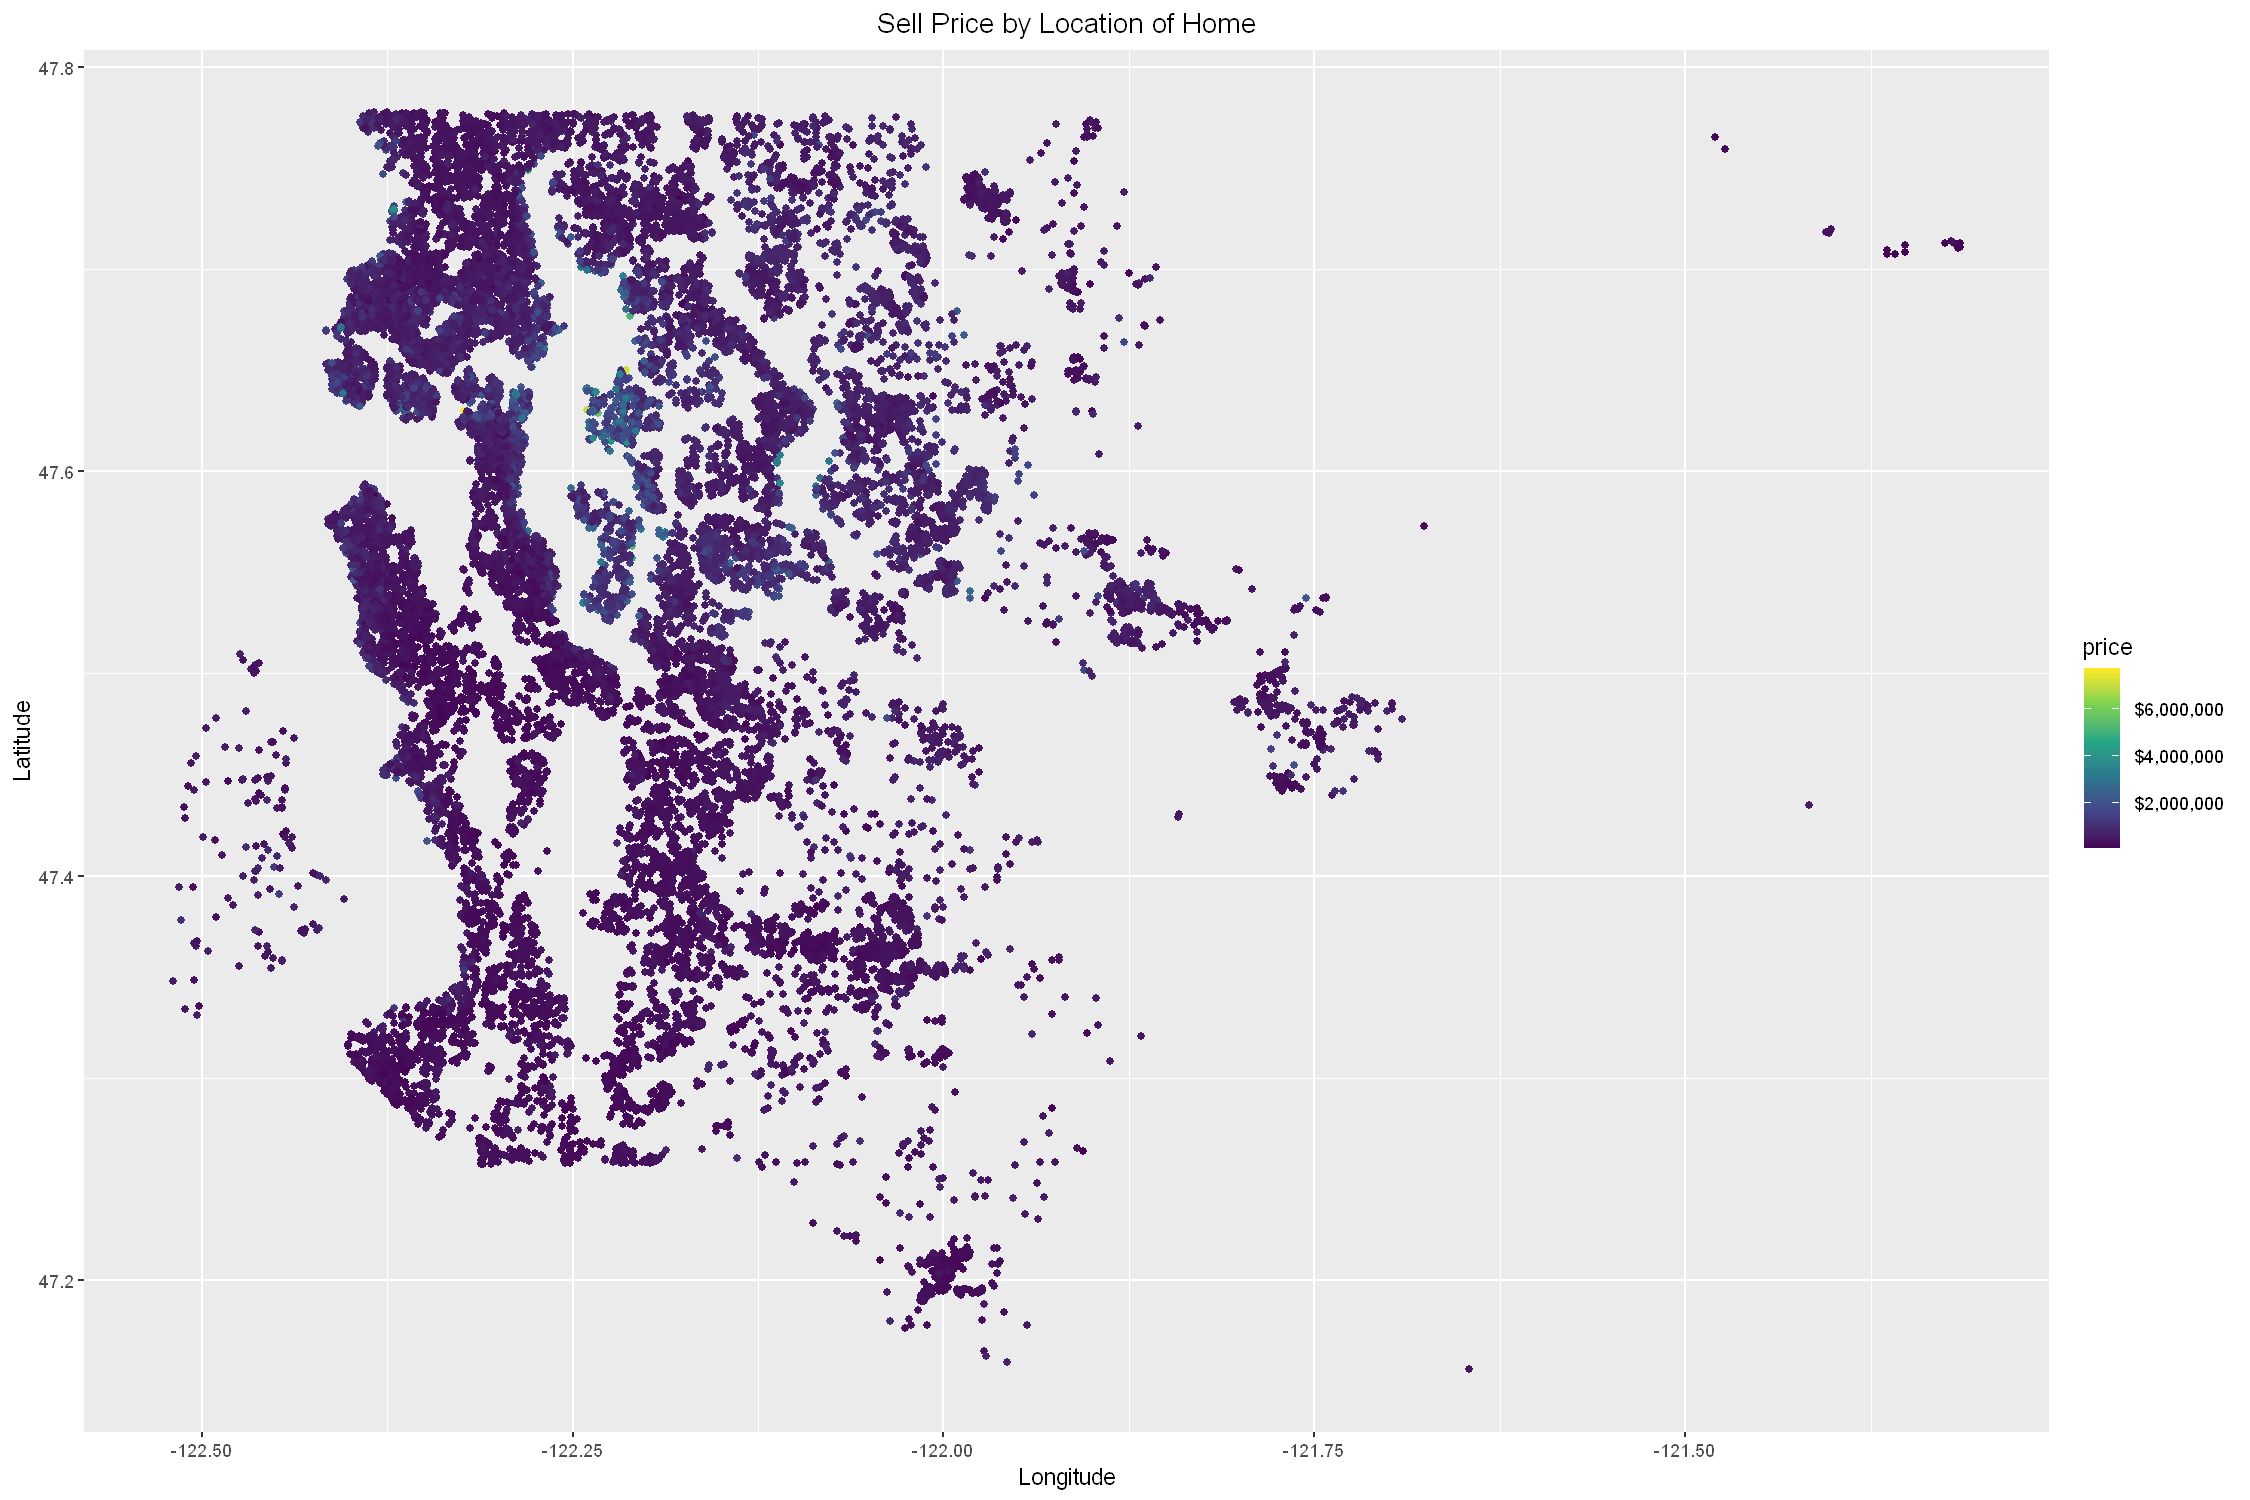

In [36]:
plot_6 <- homes %>% ggplot(aes(x=long, y = lat, color = price)) + 
                        geom_point() + 
        scale_color_continuous(labels = scales::dollar_format(),type = 'viridis') +
          labs(x = 'Longitude',
               y = 'Latitude',
               title = 'Sell Price by Location of Home')+
          theme(plot.title = element_text(hjust = .5))

plot_6

## Plot 7 - Box and Whisker Plot to Analyze Waterfront Houses

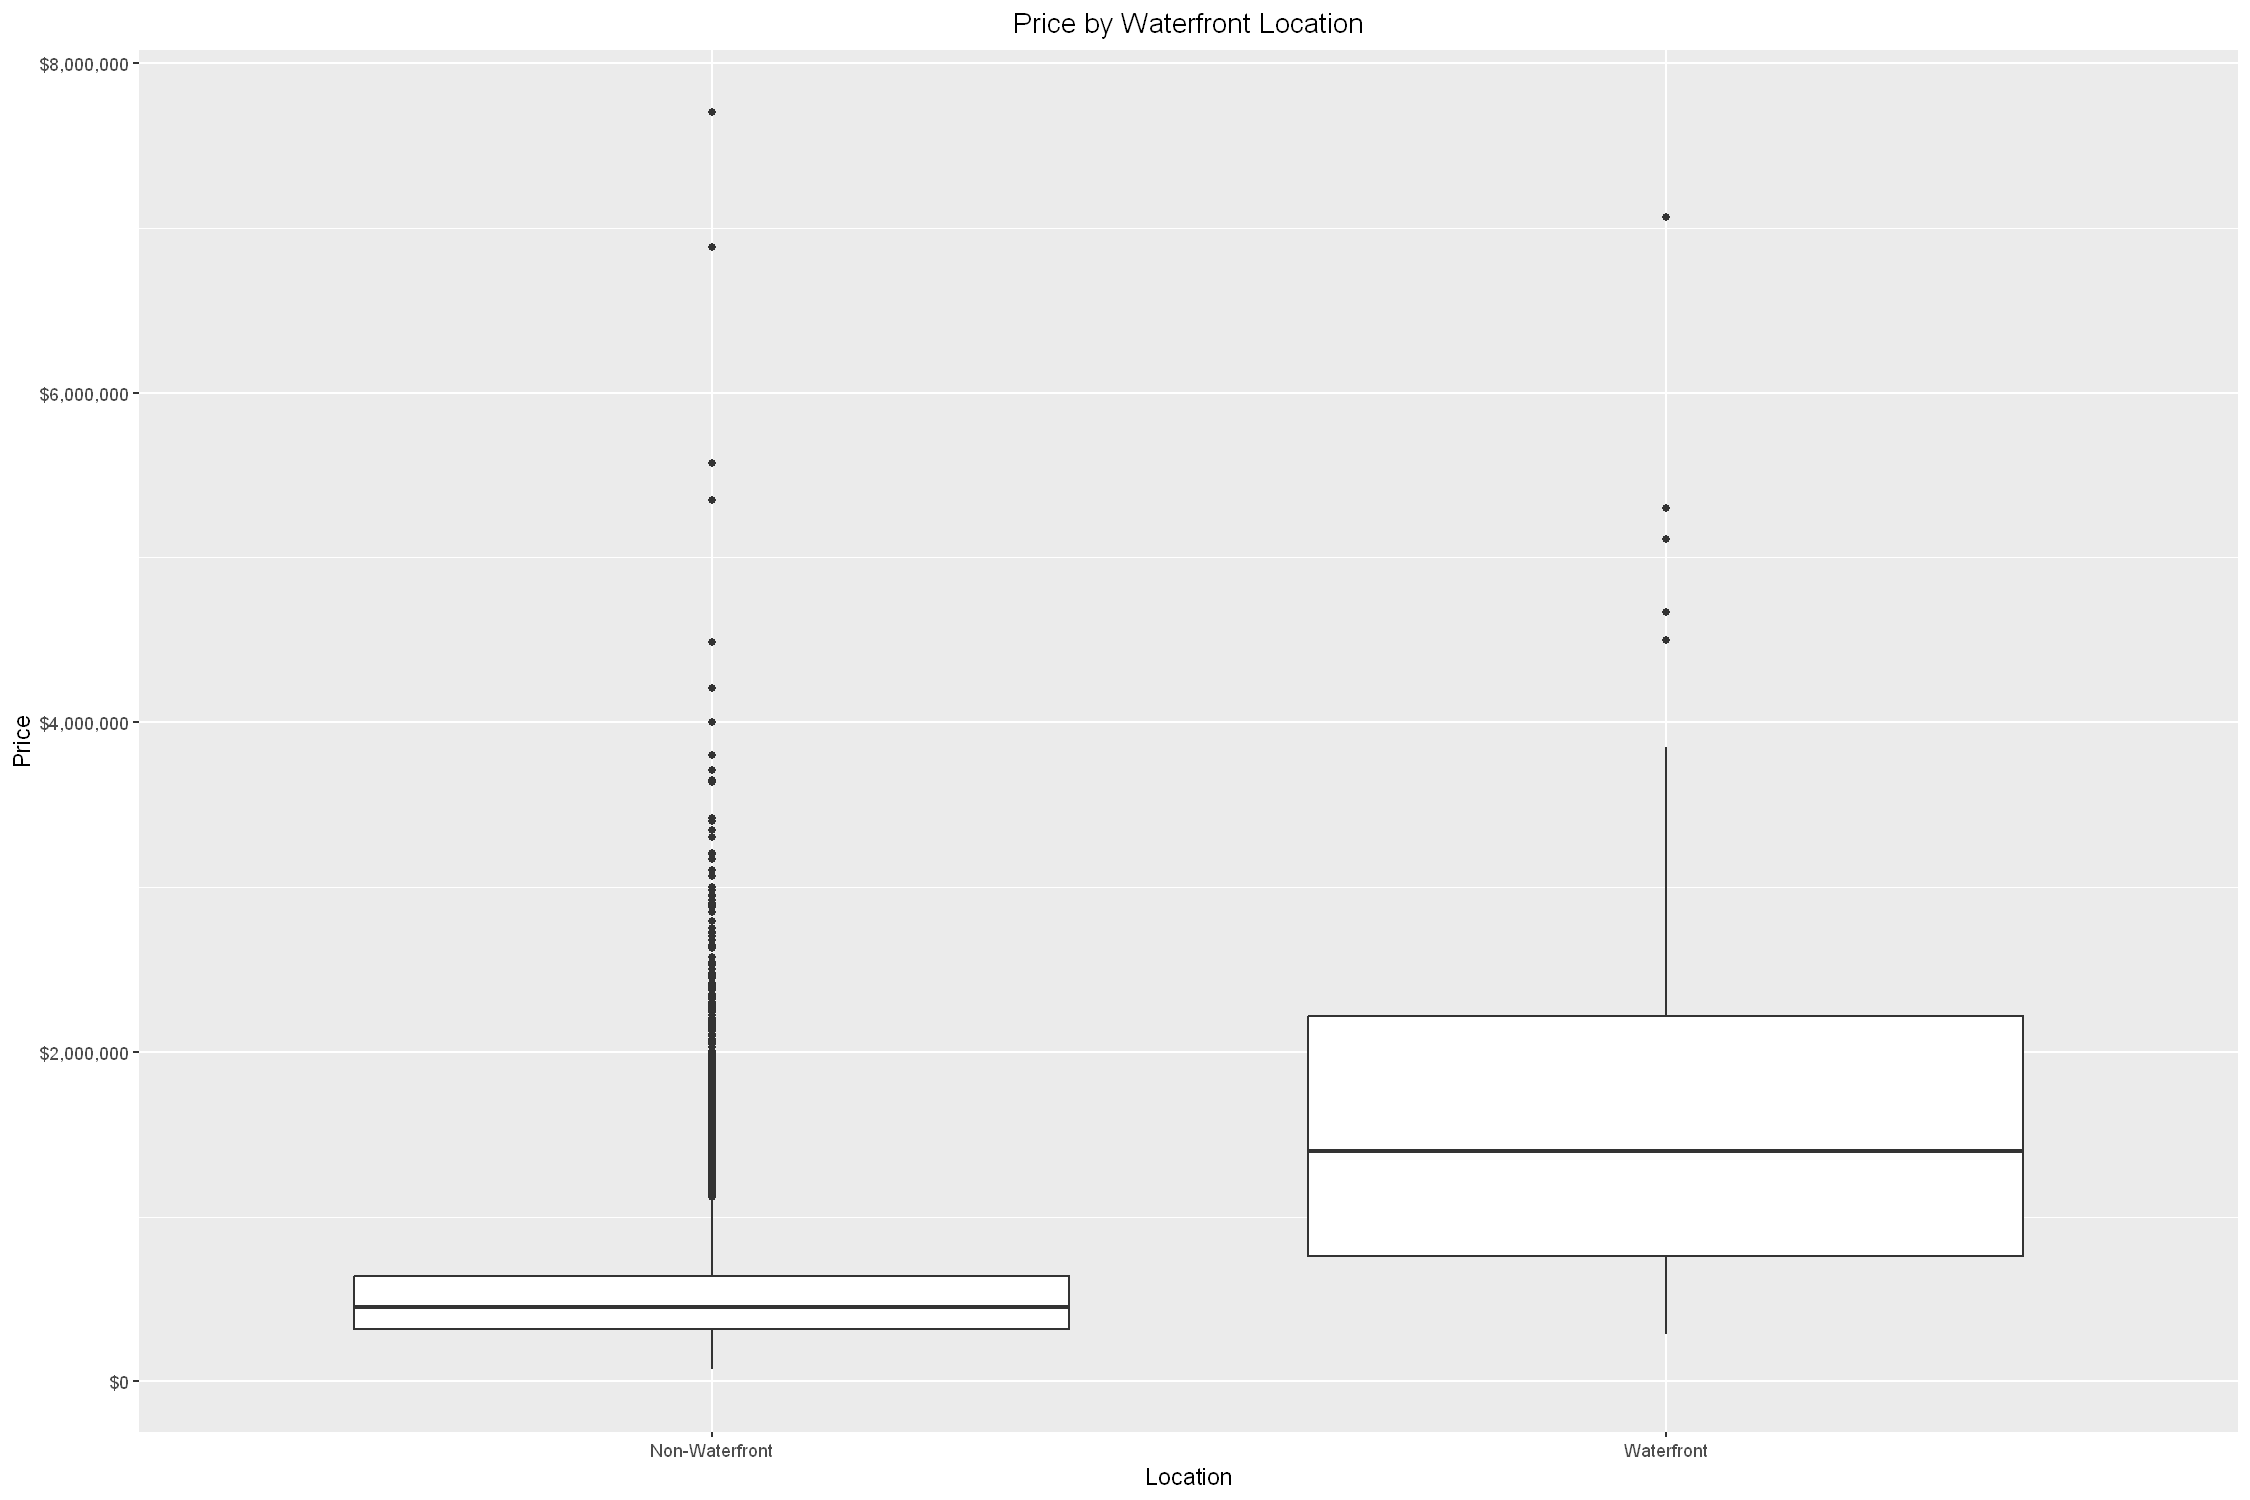

In [38]:
plot_7 <- homes %>% ggplot(aes(x=as_factor(waterfront), y = price)) + 
                    geom_boxplot() +
                    scale_y_continuous(labels = scales::dollar_format()) +
                    scale_x_discrete(labels = c('Non-Waterfront','Waterfront'))+
                    labs(x = 'Location',
                         y = 'Price',
                         title = 'Price by Waterfront Location')+
                    theme(plot.title = element_text(hjust = .5))
plot_7